In [1]:
import numpy as np               #General-purpose array-processing package
import pandas as pd              #Package for analysing data
import scipy.stats as stats      #Library of statistical functions
import matplotlib.pyplot as plt  #For plotting graphs
%matplotlib inline

# Part ONE  -   Question 1

|Planned to purchase Product A| Actually placed an order for Product A- Yes| Actually placed an order for Product A - No|Total|
|--|--|--|--|
|Yes|400|100|500|
|No|200|1300|1500|
|Total|600|1400|2000|

1.Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order

In [35]:
Plac_yes = 400 # Plac_yes is the number of people who planned and actually placed an order for Product A
Total  = 2000
J_p = round(Plac_yes / Total,3) 
print('Joint probability of the people who planned to purchase and actually placed an order. is %1.2f' % J_p)

Joint probability of the people who planned to purchase and actually placed an order. is 0.20


2.Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase

Probability of A given B is written as P(A | B).

$P(A\mid B) = \frac{P(A \quad and \quad B)}{P(B)}$

where P(A and B) = Joint probability of A and B
*     P(A)       = Marginal probability of A
*     P(B)       = Marginal probability of B

In [20]:
# P1     = P(Actually placed an order | Planned to purchase)
# P(A)   = Planned to purchase and actually placed an order
# P(B)   = Planned to purchase
P1       = (400/2000)/(500/2000)
print('P(Actually placed an order | Planned to purchase) is %1.3f' % P1)

P(Actually placed an order | Planned to purchase) is 0.800


# Part ONE- Question 2

2.An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected.

This follows Binomial-distribution since all the pre-requisites are satisfied:
* Only two potential outcome(defective,not-defective).
* Probability of success(being defective) is same accross all trails(p=0.05).
* Number of trails is fixed (n=10)
* Each trail is independent(failure of one dosen't ensures the failure of other trail)

$P(X = x\mid n,\pi)$ = $\frac{n!}{x!(n - x)!}\pi^x (1 - \pi)^{n-x} $
* where P(X = x) is the probability of getting x successes in n trials
and $\pi$ is the probability of an event of interest

In [27]:
p = 0.05                #failure rate of the manufacturing item
n = 10                  #sample size
k = np.arange(0,11)     #An array of quantities

In [53]:
binomial = stats.binom.pmf(k,n,p)    #Gives probability mass function for the binomial distribution

In [54]:
print(binomial)                      #Prints probability of each trail accross K(ranging from 0-10)

[5.98736939e-01 3.15124705e-01 7.46347985e-02 1.04750594e-02
 9.64808106e-04 6.09352488e-05 2.67259863e-06 8.03789063e-08
 1.58642578e-09 1.85546875e-11 9.76562500e-14]


In [55]:
print('A. Probability that none if the items are defective is %1.4f' %binomial[0])

A. Probability that none if the items are defective is 0.5987


In [56]:
print('B. Probability that exactly one of the items is defective is %1.4f' %binomial[1])

B. Probability that exactly one of the items is defective is 0.3151


In [57]:
cumbinomial = stats.binom.cdf(k,n,p) #Gives cumulative probability of the binomial distribution function

In [58]:
print(cumbinomial)

[0.59873694 0.91386164 0.98849644 0.9989715  0.99993631 0.99999725
 0.99999992 1.         1.         1.         1.        ]


In [33]:
print('C. Probability that two or fewer of the items are defective is %1.4f' %cumbinomial[2])

C. Probability that two or fewer of the items are defective is 0.9885


In [34]:
P = 1-cumbinomial[2] # since entire area under cumbinomial distibution is 1, Subtracting cumulative probability upto 2 defective items from 1 gives 
print('D. probability that three or more of the items are defective is %1.4f' %P)

D. probability that three or more of the items are defective is 0.0115


# Part ONE-Question 3

3.A car salesman sells on an average 3 cars per week.

This follows Poisson distribution since the below mentioned pre-requisites are satisfied:
* Discrete distribution.
* Describe the number of events occuring in a fixed time interval(one week).
* Requires only one parameter, Mean(μ = λ = 3).
* Bound by 0 and infinity(∞) [The Poisson distribution is the limit of binomial distribution as n approaches ∞and p approaches 0]

## Properties and formula
Mean μ = λ

Standard deviation σ = √ μ

  P(X = x) = $\frac{e^\lambda \lambda^x}{x!} $
where 
* P(x)              = Probability of x successes given an idea of  $\lambda$
* $\lambda$ = Average number of successes
* e                   = 2.71828 (based on natural logarithm)
* x                    = successes per unit which can take values 0,1,2,3,... $\infty$

In [60]:
rate = 3                #Average number of successes or mean
n1   = np.arange(0,15)  #Taking first 15 successes(user depended as values take 0 to ∞)
cumpoisson = stats.poisson.cdf(n1,rate)

In [61]:
cumpoisson              #Display of first 15 poisson distribution probabilities 

array([0.04978707, 0.19914827, 0.42319008, 0.64723189, 0.81526324,
       0.91608206, 0.96649146, 0.9880955 , 0.99619701, 0.99889751,
       0.99970766, 0.99992861, 0.99998385, 0.9999966 , 0.99999933])

In [62]:
P = 1 - cumpoisson[0]  #probability that in a given week the salesman sells some cars(total probability - probability of selling no cars)
print('A. Probability that in a given week he will sell some cars is %1.4f' %P)

A. Probability that in a given week he will sell some cars is 0.9502


In [63]:
P1 = cumpoisson[4] #let P1 be the probability that salesman sells more than 4 cars,       P(X>=4)
P2 = cumpoisson[1] #let P2 be the probability that salesman sells more than 1 car,        P(X>=1)
P  = P1 - P2       #Probability that the salesman sells more than 2 and less than 5 cars, P(2<=X<5) 
print('B. Probability that in a given week he will sell 2 or more but less than 5 cars is %1.4f' %P)

B. Probability that in a given week he will sell 2 or more but less than 5 cars is 0.6161


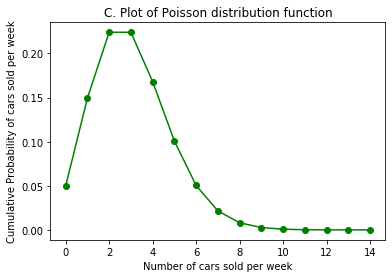

In [64]:
poisson = stats.poisson.pmf(n1,rate)                        #Probability mass function at n1 of the given RV
plt.plot(n1,poisson, 'go-')                                 #plot x and y using green circle markers which connects
plt.title('C. Plot of Poisson distribution function')       #title of graph
plt.xlabel('Number of cars sold per week')                  #X-axis lable
plt.ylabel('Cumulative Probability of cars sold per week')  #Y-axis lable
plt.show()                                                  #Display a figure

# Part ONE-Question 4

4.Recognition accuracy that measures the percentage of orders that are taken correctly is 86.8%

This follows Binomial-distribution since all the pre-requisites are satisfied:
* Only two potential outcome(recognise,doesn't-recognise).
* Probability of success(to recognise) is same accross all trails(p=0.868).
* Number of trails is fixed (n=3)
* Each trail is independent(recognition of one dosen't ensures the recognition of other trail)

Where: $P(X = x\mid n,\pi)$ = $\frac{n!}{x!(n - x)!}\pi^x (1 - \pi)^{n-x} $
* where P(X = x) is the probability of getting x successes in n trials
and $\pi$ is the probability of an event of interest

In [3]:
p=0.868                            #probability of success
n=3                                #number of trails
k=np.arange(0,4)                   #An array of quantities

In [4]:
binomial = stats.binom.pmf(k,n,p)  #probability mass function
print(binomial)

[0.00229997 0.0453721  0.2983559  0.65397203]


In [5]:
print('A. Probability that all three orders will be recognised correctly is %1.4f' %binomial[3])

A. Probability that all three orders will be recognised correctly is 0.6540


In [6]:
print('B. Probability that none of three orders will be recognised correctly is %1.4f' %binomial[0])

B. Probability that none of three orders will be recognised correctly is 0.0023


In [33]:
P=binomial[2]+binomial[3]         # P(X>=2) = P(X=2)+P(X=3)
print('C.Probability that atleast two of three orders will be recognised correctly is %1.4f' %P)


C.Probability that atleast two of three orders will be recognised correctly is 0.9523


# Part ONE- Question 5

Since it's given that the distribution is normal, we know that Z = (x - µ)/σ

In [37]:
p=(1-stats.norm.cdf(80,loc=60,scale=12))*100  #The probability (area) to the right of the z value is calculated as (1 - probability to the left)
print('A.The percentage of students who score more than 80 is %1.4f'%p)

A.The percentage of students who score more than 80 is 4.7790


In [38]:
p=(stats.norm.cdf(50,loc=60,scale=12))*100 #The probability or the area under curve to the left of the z value
print('B.The percentage of students who score less than 50 is %1.4f'%p)

B.The percentage of students who score less than 50 is 20.2328


### C. Since top 10% of the students are awarded distinction the area between 0 and z is 0.40(0.5-0.1)
* The respective Z value that will make the area = 0.40 is 1.28 (from the normal table)
* substituting Z=1.28 in Z=(X-60)/12 we get the required marks for being in the top 10%

In [47]:
X=(1.28*12)+60
print('C.The distinction mark if the highest 10% of the students are to be awarded distinction is',X)

C.The distinction mark if the highest 10% of the students are to be awarded distinction is 75.36


# or


In [7]:
p = (stats.norm.ppf(0.90,loc=60,scale=12)) #Using inverse noraml cumulative distribution function
p

75.3786187865352

# Part ONE- QUESTION6
The Food delivery service SWIGGY conducts quality checks at specified periods on the Delivery time. Historically, Every 6 deliveries of 100 are delayed due to bad roads or heavy traffic. Suppose a random sample of 10 ongoing deliveries are selected. Find
* A. Probability that none of the items are Delayed?
* B. Probability that exactly two of the items are delayed?
* C. Probability that two or fewer of the items are delayed?
* D. Probability that Four or more of the items are delayed?

## Solution
This follows Binomial-distribution since all the pre-requisites are satisfied:
* Only two potential outcome(defective,not-defective).
* Probability of success(being defective) is same accross all trails(p=0.05).
* Number of trails is fixed (n=10)
* Each trail is independent(failure of one dosen't ensures the failure of other trail)

$P(X = x\mid n,\pi)$ = $\frac{n!}{x!(n - x)!}\pi^x (1 - \pi)^{n-x} $
* where P(X = x) is the probability of getting x successes in n trials
and $\pi$ is the probability of an event of interest

In [2]:
p = 0.06                #failure rate of the manufacturing item
n = 10                  #sample size
k = np.arange(0,11)

In [3]:
binomial = stats.binom.pmf(k,n,p)    #Gives probability mass function for the binomial distribution

In [4]:
print(binomial)                      #Prints probability of each trail accross K(ranging from 0-10)

[5.38615114e-01 3.43796881e-01 9.87501680e-02 1.68085392e-02
 1.87754960e-03 1.43812309e-04 7.64959093e-06 2.79012435e-07
 6.67848914e-09 9.47303424e-11 6.04661760e-13]


In [9]:
print('A. Probability that none if the items are delayed is %1.4f' %binomial[0])

A. Probability that none if the items are delayed is 0.5386


In [10]:
print('B. Probability that exactly two of the items is delayed is %1.4f' %binomial[2])

B. Probability that exactly two of the items is delayed is 0.0988


In [7]:
cumbinomial = stats.binom.cdf(k,n,p) #Gives cumulative probability of the binomial distribution function

In [11]:
print('C. Probability that two or fewer of the items are delayed is %1.4f' %cumbinomial[2])

C. Probability that two or fewer of the items are delayed is 0.9812


In [13]:
P = 1-cumbinomial[3] # since entire area under cumbinomial distibution is 1, Subtracting cumulative probability upto 3 delayed deliveries from 1 gives 
print('D. probability that Four or more of the items are delayed is %1.4f' %P)

D. probability that Four or more of the items are delayed is 0.0020
